# Product Review Rating Predication Project

In [1]:
#Importing warning library to avoid any warnings
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset excel file using pandas.
df=pd.read_csv('Rating_Prediction_dataset.csv') 

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 95188
No. of Columns : 3


,Unnamed: 0,Product_Review,Ratings
0,0,Premetto che mi sono sentito in dovere di scr...,2.0
1,1,NaN,2.0
2,2,"Let’s start from the very beginning, unpacked ...",2.0
3,3,Qualidade sólida de construção e embalagem pre...,2.0
4,4,NaN,2.0


In [4]:
# Dropping unnecssary index column Unnamed:0 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95188 entries, 0 to 95187
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Review  90443 non-null  object 
 1   Ratings         95188 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


###### There are some missing value in product review

###### The datatype of Product review is object while datatypes of Ratings is float

### Data Integrity Check

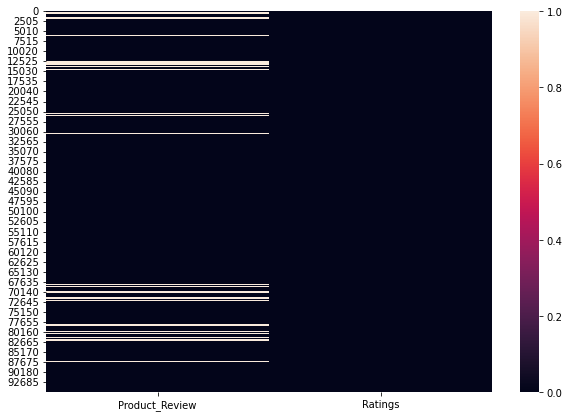

Product_Review    4745
Ratings              0
dtype: int64

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())
plt.show()
df.isnull().sum()


In [7]:
# Replacing missing data with 'Review Not Available' using pandas fillna()
df['Product_Review'].fillna('Review Not Available',inplace=True)

In [8]:
df.isnull().sum().any()

False

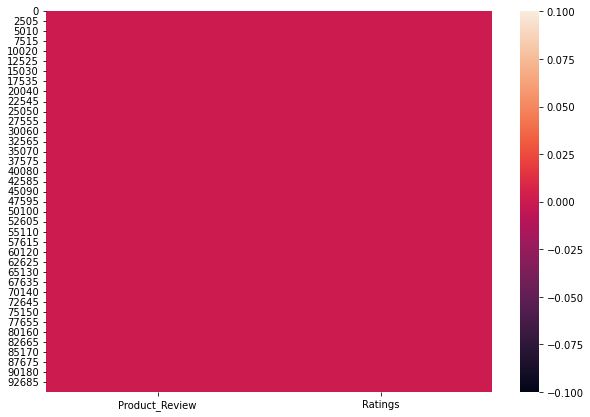

Product_Review    0
Ratings           0
dtype: int64

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())
plt.show()
df.isnull().sum()


## Exploration of Target

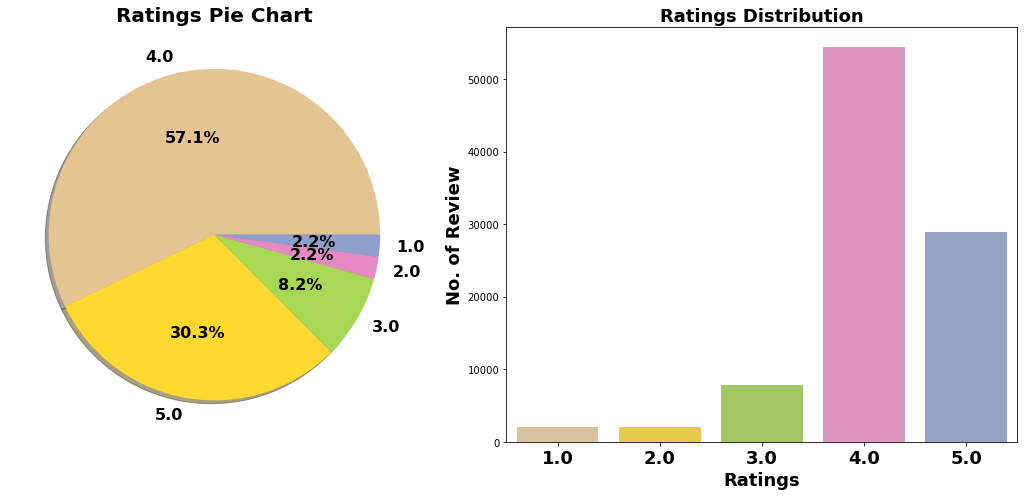

Value Counts of Rating:


4.0    54382
5.0    28864
3.0     7842
2.0     2050
1.0     2050
Name: Ratings, dtype: int64

In [10]:
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Ratings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Ratings',data=df,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
df['Ratings'].value_counts()

In [11]:
# Average Rating given by user
print("Average rating given by users is " + str(df['Ratings'].mean()))

Average rating given by users is 4.113165525066185


###### Around 57% customer given 4- star rating followed by 2.2% customer given lowest 1-star rating.

###### Average Rating is 4.1 .

### Text Mining

Removing Punctuations and other special characters

Word Tokenzation

Removing Stop Words

Stemming and Lemmatising

Applying Count Vectoriser

In [13]:
#Importing required libraries
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

In [14]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [15]:
#Calling the class
clean_text(df, 'Product_Review')
df['Product_Review'].tail(3)

95185    overall good product old router crashed needed...
95186    far good product described details section res...
95187    awesome product working grnumbr signal strengt...
Name: Product_Review, dtype: object

#### Data Tokenization

In [16]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Product_Review'] = df['Product_Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,Product_Review,Ratings
0,"[premetto, che, mi, sono, sentito, dovere, di,...",2.0
1,"[review, available]",2.0
2,"[let, start, beginning, unpacked, outer, carto...",2.0
3,"[qualidade, sólida, de, construção, e, embalag...",2.0
4,"[review, available]",2.0


#### Stemming & Lemmatization

In [19]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [20]:
#Processing review with above Function
processed_review = []

for doc in df.Product_Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

95188


[['premetto',
  'che',
  'sono',
  'sentito',
  'dover',
  'scriver',
  'questa',
  'recension',
  'visto',
  'che',
  'questo',
  'momento',
  'solo',
  'una',
  'assurdament',
  'negativa',
  'numbr',
  'stella',
  'citandola',
  'leggo',
  'levando',
  'cuffi',
  'non',
  'interromp',
  'riproduzion',
  'nel',
  'video',
  'allegato',
  'alla',
  'recension',
  'faccio',
  'veder',
  'che',
  'questo',
  'non',
  'sia',
  'assolutament',
  'vero',
  'messo',
  'microfono',
  'vicino',
  'padiglioni',
  'quindi',
  'quello',
  'cavo',
  'che',
  'spunta',
  'dall',
  'cuffi',
  'non',
  'può',
  'più',
  'spegner',
  'apparato',
  'basterebb',
  'legger',
  'due',
  'minuti',
  'manual',
  'che',
  'arriva',
  'confezion',
  'per',
  'capir',
  'che',
  'per',
  'spegnerl',
  'accenderl',
  'basta',
  'premer',
  'per',
  'circa',
  'numbr',
  'numbr',
  'secondi',
  'tasto',
  'central',
  'sul',
  'padiglion',
  'destro',
  'qualità',
  'ridicola',
  'effettivament',
  'abituati',


In [21]:
df['clean_review']=processed_review  #Assigning this to the dataframe
df.head()

,Product_Review,Ratings,clean_review
0,"[premetto, che, mi, sono, sentito, dovere, di,...",2.0,"[premetto, che, sono, sentito, dover, scriver,..."
1,"[review, available]",2.0,"[review, avail]"
2,"[let, start, beginning, unpacked, outer, carto...",2.0,"[let, start, begin, unpack, outer, carton, rev..."
3,"[qualidade, sólida, de, construção, e, embalag...",2.0,"[qualidad, sólida, construção, embalagem, prem..."
4,"[review, available]",2.0,"[review, avail]"


In [22]:
df['Product_Review'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))
df.head()

,Product_Review,Ratings,clean_review
0,premetto che sono sentito dover scriver questa...,2.0,"[premetto, che, sono, sentito, dover, scriver,..."
1,review avail,2.0,"[review, avail]"
2,let start begin unpack outer carton reveal say...,2.0,"[let, start, begin, unpack, outer, carton, rev..."
3,qualidad sólida construção embalagem premium m...,2.0,"[qualidad, sólida, construção, embalagem, prem..."
4,review avail,2.0,"[review, avail]"


#### Word Cloud

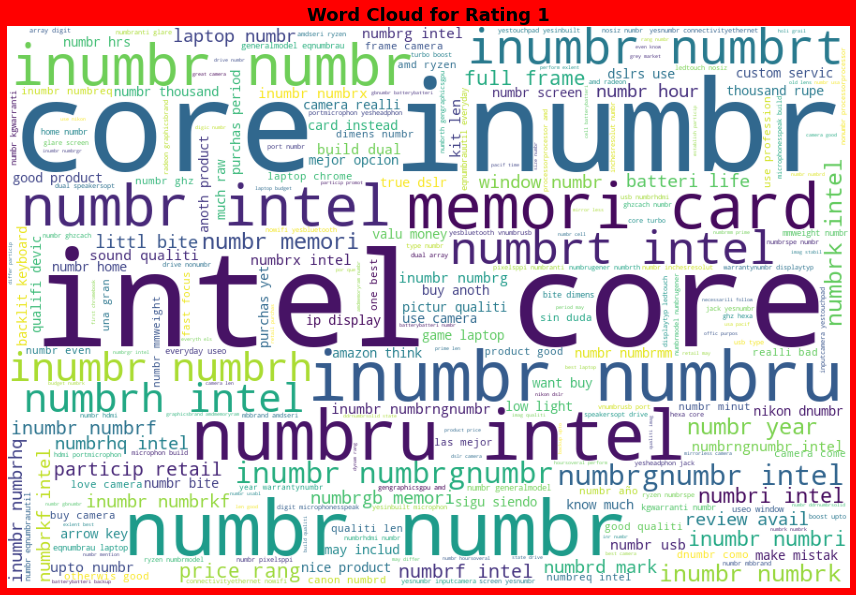

In [23]:
#Getting sense of words in Rating 1
one = df['Product_Review'][df['Ratings']==1.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

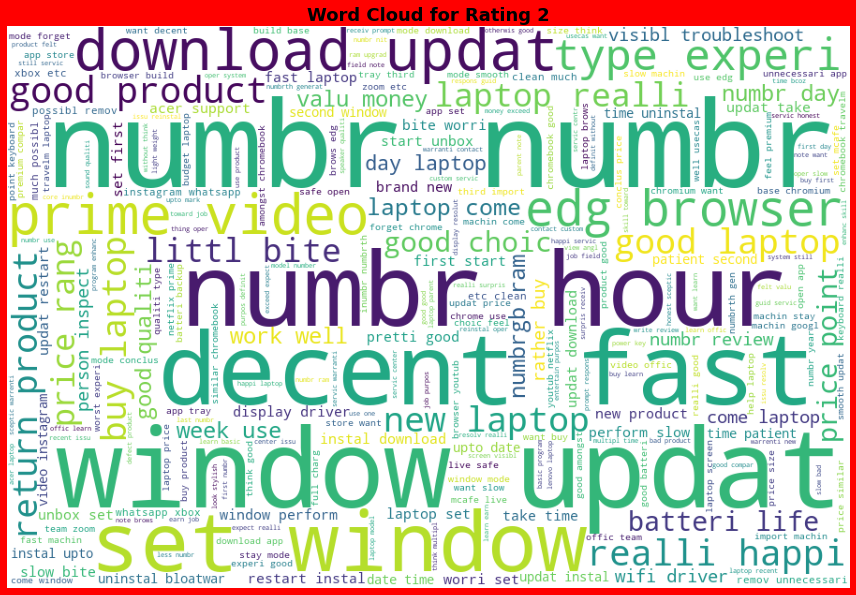

In [24]:
#Getting sense of words in Rating 2
one = df['Product_Review'][df['Ratings']==2.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 2',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

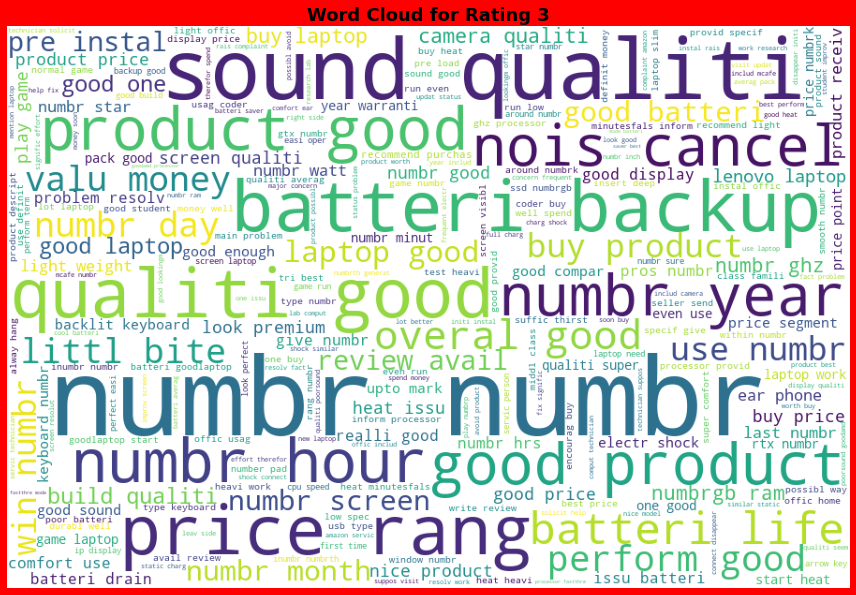

In [25]:
#Getting sense of words in Rating 3
one = df['Product_Review'][df['Ratings']==3.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 3',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

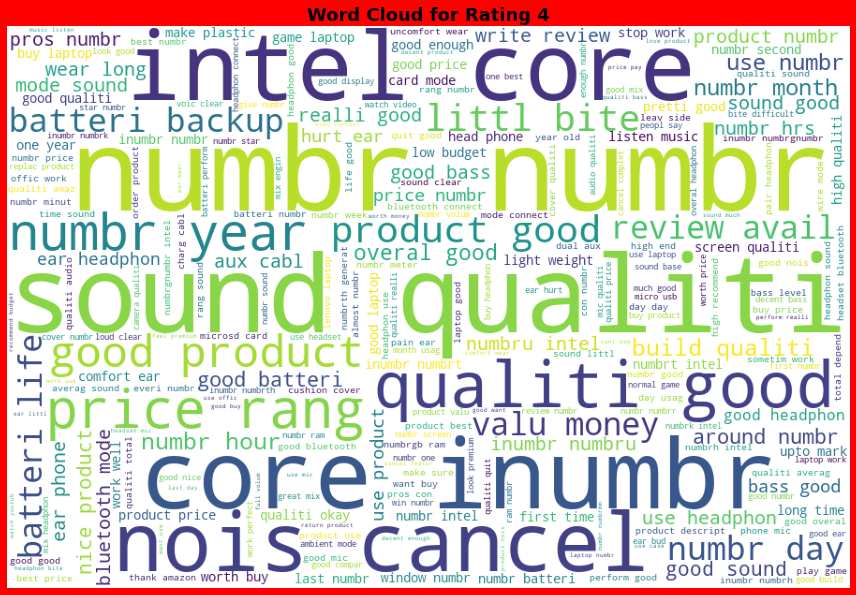

In [26]:
#Getting sense of words in Rating 4
one = df['Product_Review'][df['Ratings']==4.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 4',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

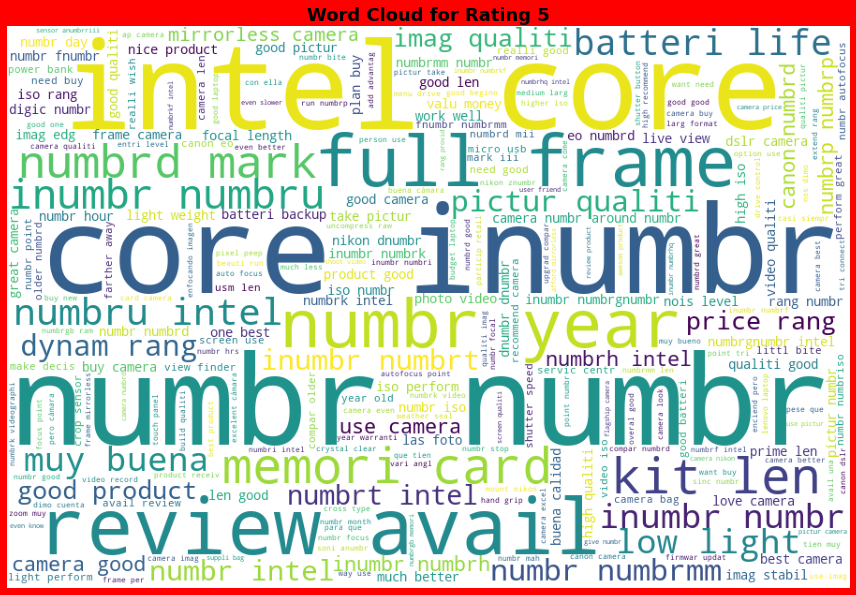

In [27]:
# Getting sense of words in Rating 5
one = df['Product_Review'][df['Ratings']==5.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 5',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

In [28]:
# Converting text into numeric using TfidfVectorizer
tf = TfidfVectorizer()
features = tf.fit_transform(df['Product_Review'])
X=features
Y=df[['Ratings']]

## Machine Learning Model Building

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.2)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (76150, 5839)
Training target vector size: (76150, 1)
Test feature matrix size: (19038, 5839)
Test target vector size: (19038, 1)


### Best Random state

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7347935707532304 on Random_state 74


##### Logistics Regression

In [33]:
# Creating train_test_split using best random_state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=74, test_size=.2)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=74, test_size=.2)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7347935707532304


Confusion matrix of Logistics Regression : 
 [[   0    3    5  202  190]
 [   0   69   14  228   65]
 [   0   15  167 1064  269]
 [   0   59   73 9709 1152]
 [   0   25   60 1625 4044]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       400
         2.0       0.40      0.18      0.25       376
         3.0       0.52      0.11      0.18      1515
         4.0       0.76      0.88      0.82     10993
         5.0       0.71      0.70      0.70      5754

    accuracy                           0.73     19038
   macro avg       0.48      0.38      0.39     19038
weighted avg       0.70      0.73      0.70     19038



In [37]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.57322198 0.76441853 0.77497636 0.61779692 0.40316226]
Mean CV Score : 0.6267152112531227
Std deviation : 0.13701135440634848


#### Decision Tree Classifier

In [38]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.7350036768568127


Confusion matrix of Decision Tree Classifier : 
 [[   0    3    8  191  198]
 [   0   93   17  216   50]
 [   0   15  211 1039  250]
 [   0   77  114 9699 1103]
 [   0   48  110 1606 3990]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       400
         2.0       0.39      0.25      0.30       376
         3.0       0.46      0.14      0.21      1515
         4.0       0.76      0.88      0.82     10993
         5.0       0.71      0.69      0.70      5754

    accuracy                           0.74     19038
   macro avg       0.47      0.39      0.41     19038
weighted avg       0.70      0.74      0.71     19038



In [39]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.56560563 0.76116189 0.76599433 0.59930661 0.3576719 ]
Mean CV Score : 0.6099480720507986
Std deviation : 0.1502922553883939


#### Random Forest Classifier

In [40]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.7397835907133102


Confusion matrix of Random Forest Classifier : 
 [[   0    3    8  191  198]
 [   0   93   17  216   50]
 [   0   15  195 1040  265]
 [   0   77   90 9672 1154]
 [   0   48   88 1494 4124]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       400
         2.0       0.39      0.25      0.30       376
         3.0       0.49      0.13      0.20      1515
         4.0       0.77      0.88      0.82     10993
         5.0       0.71      0.72      0.71      5754

    accuracy                           0.74     19038
   macro avg       0.47      0.39      0.41     19038
weighted avg       0.70      0.74      0.71     19038



In [41]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.56560563 0.76168715 0.76825297 0.60576772 0.36665441]
Mean CV Score : 0.6135935751877859
Std deviation : 0.14777975062364215


#### AdaBoost Classifier

In [42]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.6592604265153903


Confusion matrix of AdaBoost Classifier : 
 [[    0     0     1   256   143]
 [    0    41     5   252    78]
 [    0     4    71  1258   182]
 [    7    44    47 10007   888]
 [   19    25    24  3254  2432]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       400
         2.0       0.36      0.11      0.17       376
         3.0       0.48      0.05      0.09      1515
         4.0       0.67      0.91      0.77     10993
         5.0       0.65      0.42      0.51      5754

    accuracy                           0.66     19038
   macro avg       0.43      0.30      0.31     19038
weighted avg       0.63      0.66      0.61     19038



In [43]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.54947999 0.67880029 0.71724971 0.63665494 0.39843463]
Mean CV Score : 0.5961239110154684
Std deviation : 0.11349565295240441


#### Gradient Boosting Classifier

In [44]:
grad_bc=GradientBoostingClassifier()
grad_bc.fit(X_train,Y_train)
y_pred=grad_bc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.7144658052316419


Confusion matrix of Gradient Boosting Classifier : 
 [[    8     0     2   221   169]
 [    0    71     5   284    16]
 [    0    15    89  1209   202]
 [    3    44    14 10078   854]
 [   12    35    24  2327  3356]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

         1.0       0.35      0.02      0.04       400
         2.0       0.43      0.19      0.26       376
         3.0       0.66      0.06      0.11      1515
         4.0       0.71      0.92      0.80     10993
         5.0       0.73      0.58      0.65      5754

    accuracy                           0.71     19038
   macro avg       0.58      0.35      0.37     19038
weighted avg       0.70      0.71      0.67     19038



In [45]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(grad_bc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', grad_bc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.57621599 0.7399937  0.78275029 0.65624836 0.40631402]
Mean CV Score : 0.6323044706626592
Std deviation : 0.13343299812570542


## Hyper Parameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameter = { 'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [75,100,150]}

In [48]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10,n_jobs = -1)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [75, 100, 150]},
             verbose=10)

In [49]:
GCV.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 75}

In [50]:
Final_mod = RandomForestClassifier(criterion='gini',n_estimators= 75,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.7397835907133102


Confusion matrix of Random Forest Classifier : 
 [[   0    3    8  191  198]
 [   0   84   17  216   59]
 [   0   15  208 1026  266]
 [   0   74  103 9650 1166]
 [   0   39   89 1484 4142]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       400
         2.0       0.39      0.22      0.28       376
         3.0       0.49      0.14      0.21      1515
         4.0       0.77      0.88      0.82     10993
         5.0       0.71      0.72      0.72      5754

    accuracy                           0.74     19038
   macro avg       0.47      0.39      0.41     19038
weighted avg       0.70      0.74      0.71     19038



## Saving model

In [51]:
import joblib
joblib.dump(Final_mod,'Rating_Prediction.pkl')

['Rating_Prediction.pkl']